# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading CSV

In [2]:
df = pd.read_csv('./wheat-seeds.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Adding column names

In [3]:
df.columns = ['Area','Perimeter','Compactness','LengthOfKernel','WidthOfKernel',
              'AsymmetryCoefficient','LengthOfKernelGroove','SeedType']

In [4]:
df.head()

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove,SeedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Checking for missing data

In [5]:
nulldata = pd.DataFrame(df.isnull().sum(),columns=['Null Data'])
nulldata

,Null Data
Area,0
Perimeter,0
Compactness,0
LengthOfKernel,0
WidthOfKernel,0
AsymmetryCoefficient,0
LengthOfKernelGroove,0
SeedType,0


## Exploratory Data Analysis

In [6]:
df.shape

(210, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  210 non-null    float64
 1   Perimeter             210 non-null    float64
 2   Compactness           210 non-null    float64
 3   LengthOfKernel        210 non-null    float64
 4   WidthOfKernel         210 non-null    float64
 5   AsymmetryCoefficient  210 non-null    float64
 6   LengthOfKernelGroove  210 non-null    float64
 7   SeedType              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [8]:
df['SeedType'].value_counts()

SeedType
1    70
2    70
3    70
Name: count, dtype: int64

In [9]:
df.describe()

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove,SeedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## Calculate basic statistical

In [10]:
numerical_cols = ['Area', 'Perimeter', 'Compactness', 'LengthOfKernel', 
                 'WidthOfKernel', 'AsymmetryCoefficient', 'LengthOfKernelGroove']

In [11]:
stats = {}

In [12]:
for col in numerical_cols:
    stats[col] = {
        'Range': df[col].max() - df[col].min(),
        'Min': df[col].min(),
        'Max': df[col].max(), 
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Mode': df[col].mode()[0],
        'Std Dev': df[col].std()
    }

In [13]:
stats_df = pd.DataFrame(stats).round(4)
stats_df

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove
Range,10.5900,4.8400,0.1102,1.7760,1.4030,7.6909,2.0310
Min,10.5900,12.4100,0.8081,4.8990,2.6300,0.7651,4.5190
Max,21.1800,17.2500,0.9183,6.6750,4.0330,8.4560,6.5500
Mean,14.8475,14.5593,0.8710,5.6285,3.2586,3.7002,5.4081
Median,14.3550,14.3200,0.8734,5.5235,3.2370,3.5990,5.2230
Mode,11.2300,13.4700,0.8823,5.2360,3.0260,2.1290,5.0010
Std Dev,2.9097,1.3060,0.0236,0.4431,0.3777,1.5036,0.4915


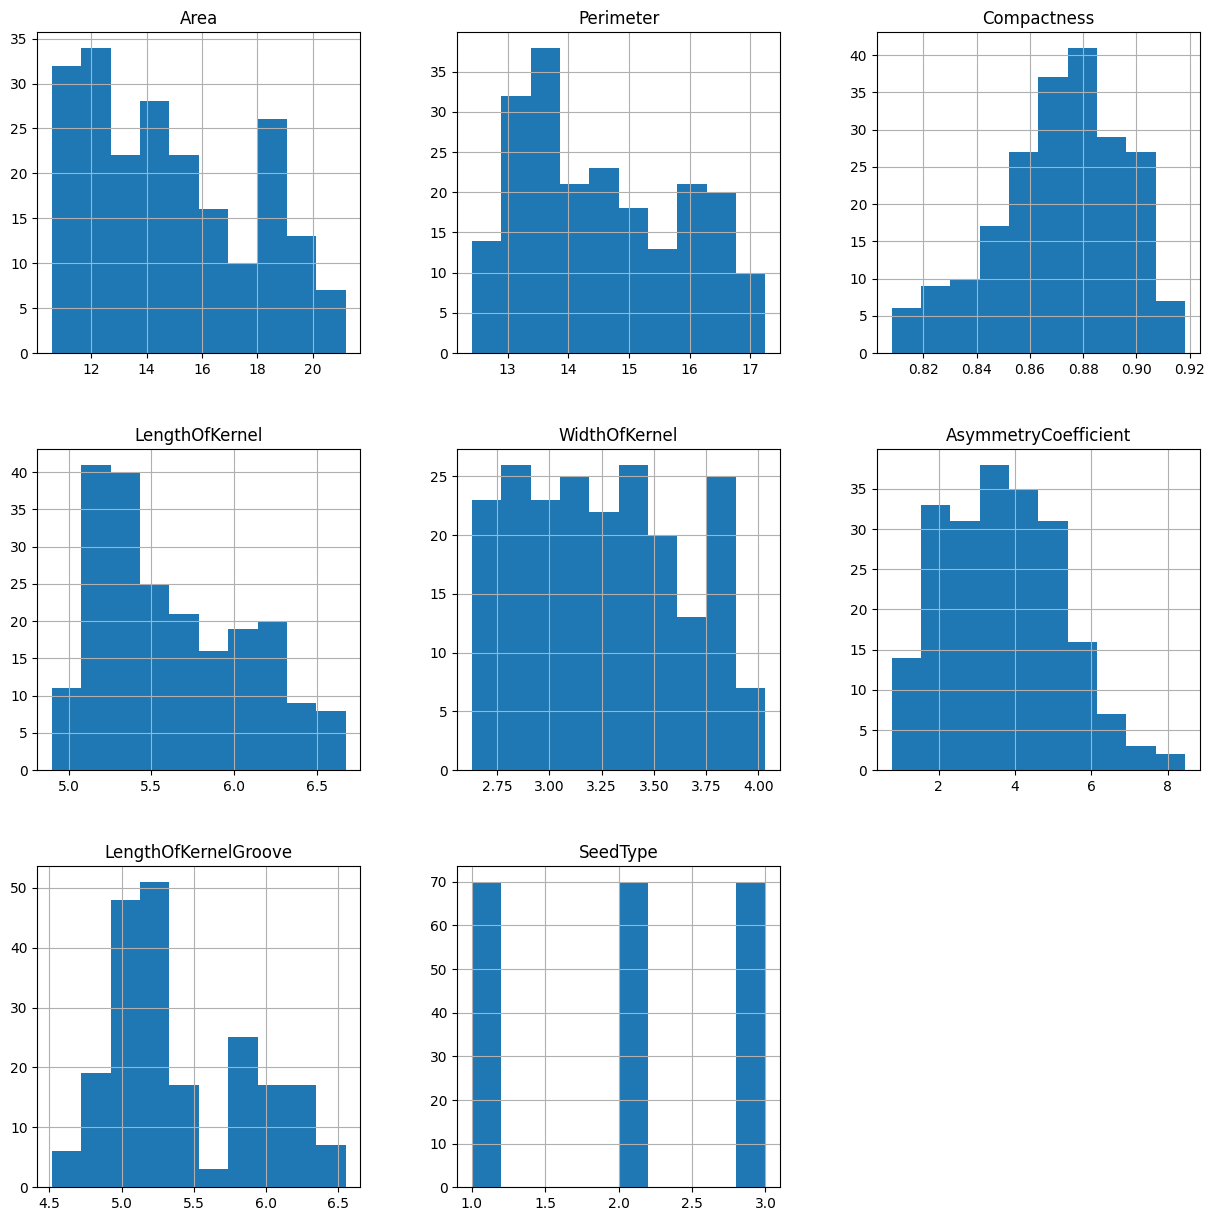

In [14]:
df.hist(figsize=(15,15))
plt.show()